# Tutorial: Binary Intrinsic Dimension

## Measuring the BID of random bits:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# this environmental variable must be set <before> the BID imports, to work with JAX double-precision
os.environ["JAX_ENABLE_X64"] = "True"
from dadapy.hamming import BID, Hamming

# REPRODUCIBILITY
seed = 1
np.random.seed(seed=seed)

In [2]:
# RANDOM DATA
L = 100  # number of bits
Ns = 5000  # number of samples

# spins must be normalized to +-1
X = (2 * np.random.randint(low=0, high=2, size=(Ns, L)) - 1)

In [3]:
# DEFINING COORDINATES
H = Hamming(coordinates=X)

# COMPUTING DISTANCES
H.compute_distances()

# COMPUTING HISTOGRAM OF DISTANCES, NOT SAVING IT
histfolder = f'datasets/hamming/random_spins/L{L}/hist/'
H.D_histogram(compute_flag=1,
              save=True,
              resultsfolder=histfolder)

### OPTIMIZATION

In [10]:
# PARAMETER DEFINITIONS FOR OPTIMIZATION
alphamin = 0  # order of  min_quantile, to remove poorly sampled parts of the histogram
alphamax = .3  # order of max_quantile, to define r* (named rmax here).
delta = 5e-3  # stochastic optimization step
Nsteps = int(1e5)  # number of optimization steps
optfolder0 = f"datasets/hamming/random_spins/L{L}/opt/"  # folder where optimization results are saved
export_results = 0 # flag to export d0,d1,logKL,Pemp,Pmodel after optimization (default=1)
export_logKLs = 0  # flag to export the logKLs during optimization (default=0)

B = BID(
    H,
    alphamin=alphamin,
    alphamax=alphamax,
    seed=seed,
    delta=delta,
    Nsteps=Nsteps,
    export_results=export_results,
    export_logKLs=export_logKLs,
    optfolder0=optfolder0,
    L=L,
)

B.computeBID()  # results are exported and defined as attributes of B

starting optimization
optimization took 0.0 minutes
d_0=99.529,d_1=0.015,logKL=-12.06


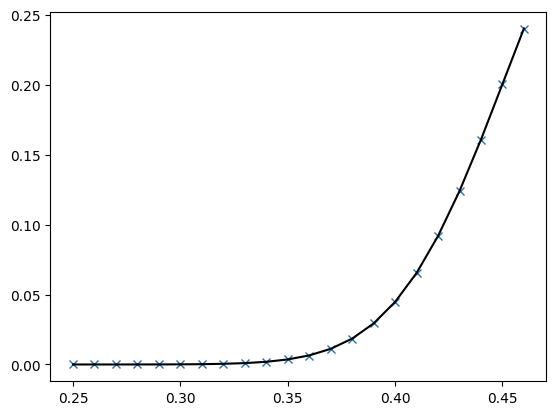

In [11]:
fig,ax = plt.subplots(1)

# empirical distribution of distances:
ax.plot(B.remp/B.L,
        B.Pemp,
        'x',
        )
# model fit
ax.plot(B.remp/B.L,
        B.Pmodel,
        '-',
        color='black',
        )
plt.show()


## BID OF 